In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [68]:
transactionData = pd.read_excel("QVI_transaction_data.xlsx")
customerData = pd.read_csv("QVI_purchase_behaviour.csv")

In [69]:
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [70]:
transactionData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [71]:
transactionData['DATE'] = pd.to_datetime(transactionData['DATE'], origin= "1899-12-30", unit='D')

In [72]:
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [73]:
transactionData.PROD_NAME.value_counts()

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64

In [74]:
product_names = transactionData['PROD_NAME'].unique()
product_names

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [75]:
# product_words = [word for name in product_names for word in name.split()]
# product_words

In [76]:
# clean_words = [re.sub(r'[0-9&\s]', '', word) for word in product_words]
# clean_words

In [77]:
# word_counts = pd.Series(clean_words).value_counts()
# word_counts

In [78]:
transactionData = transactionData[~transactionData['PROD_NAME'].str.contains('Salsa')]
transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [79]:
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [80]:
transactionData.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,2018-12-30 01:19:01.211467520,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828


In [81]:
transactionData.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [82]:
large_purchases = transactionData[transactionData['PROD_QTY'] == 200]
large_purchases

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [83]:
duplicate_customers = large_purchases['LYLTY_CARD_NBR'].duplicated().any()
duplicate_customers

np.True_

In [84]:
customer_to_remove = large_purchases.groupby('LYLTY_CARD_NBR').size()[large_purchases.groupby('LYLTY_CARD_NBR').size() == 2].index[0]
customer_to_remove

np.int64(226000)

In [85]:
transactionData = transactionData[transactionData['LYLTY_CARD_NBR'] != customer_to_remove]


In [86]:
transactionData.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [87]:
start_date = pd.to_datetime('2018-07-01')
end_date = pd.to_datetime('2019-06-30')
date_range = pd.date_range(start=start_date, end=end_date)

In [88]:
transactions_by_date = transactionData.groupby('DATE').size().reset_index(name='TRANSACTION_COUNT')
transactions_by_date

,DATE,TRANSACTION_COUNT
0,2018-07-01,663
1,2018-07-02,650
2,2018-07-03,674
3,2018-07-04,669
4,2018-07-05,660
...,...,...
359,2019-06-26,657
360,2019-06-27,669
361,2019-06-28,673
362,2019-06-29,703


In [89]:
full_date_df = pd.DataFrame(date_range, columns=['DATE'])
full_date_df

,DATE
0,2018-07-01
1,2018-07-02
2,2018-07-03
3,2018-07-04
4,2018-07-05
...,...
360,2019-06-26
361,2019-06-27
362,2019-06-28
363,2019-06-29


In [90]:
merged_data = pd.merge(full_date_df, transactions_by_date,on='DATE',how='left').fillna(0)
merged_data

,DATE,TRANSACTION_COUNT
0,2018-07-01,663.0
1,2018-07-02,650.0
2,2018-07-03,674.0
3,2018-07-04,669.0
4,2018-07-05,660.0
...,...,...
360,2019-06-26,657.0
361,2019-06-27,669.0
362,2019-06-28,673.0
363,2019-06-29,703.0


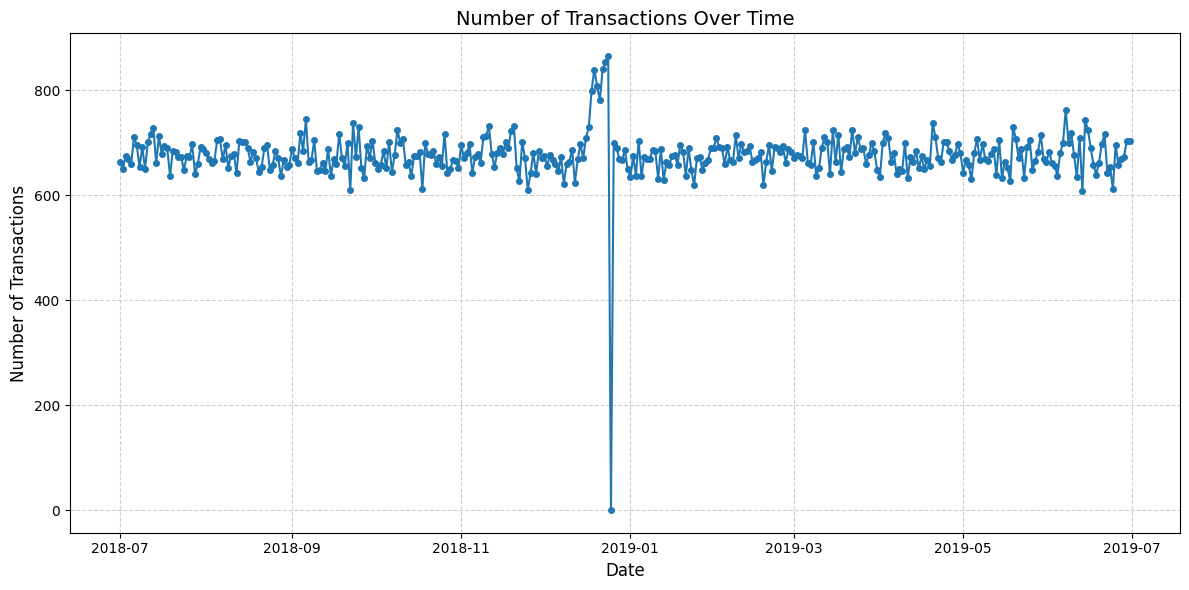

In [91]:
plt.figure(figsize=(12, 6))
plt.plot(merged_data['DATE'], merged_data['TRANSACTION_COUNT'], marker='o', linestyle='-', markersize=4)
plt.title('Number of Transactions Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [92]:
transactionData

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [93]:
transactionData['PACK_SIZE'] = transactionData['PROD_NAME'].str.extract(r'(\d+)(?=g)').astype(float)
transactionData.head()

C:\Users\GAURAV BHATIYA\AppData\Local\Temp\ipykernel_13288\2473661428.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactionData['PACK_SIZE'] = transactionData['PROD_NAME'].str.extract(r'(\d+)(?=g)').astype(float)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0


In [94]:
transactionData['PACK_SIZE'].max(), transactionData['PACK_SIZE'].min()

(np.float64(380.0), np.float64(70.0))

In [95]:
pack_size_counts = transactionData['PACK_SIZE'].value_counts().sort_index()
pack_size_counts

PACK_SIZE
70.0      1507
90.0      3008
110.0    22387
125.0     1454
134.0    25102
135.0     3257
150.0    38705
160.0     2970
165.0    15297
170.0    19983
175.0    64929
180.0     1468
190.0     2995
200.0     4473
210.0     3167
220.0     1564
250.0     3169
270.0     6285
330.0    12540
380.0     6416
Name: count, dtype: int64

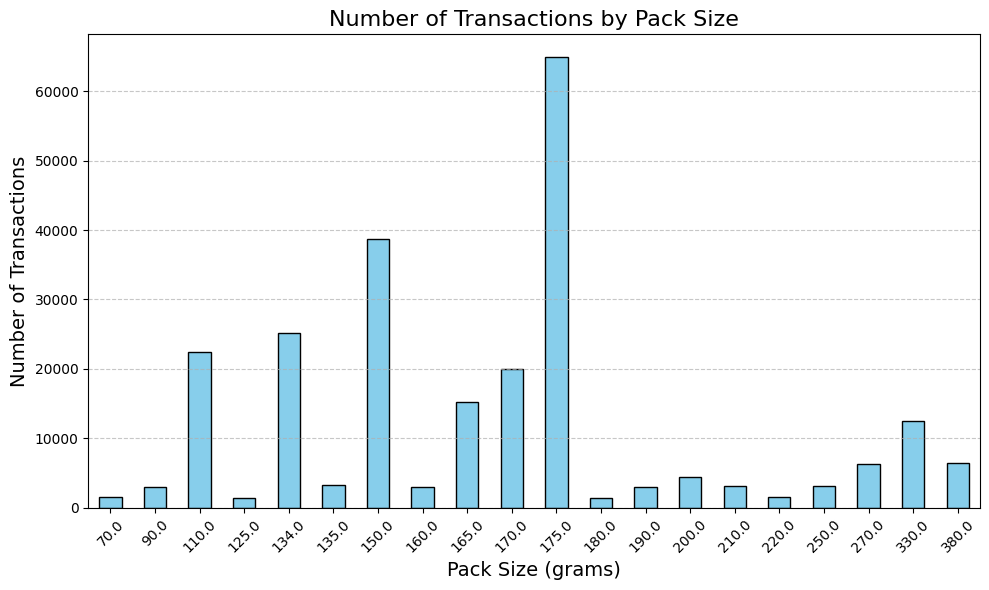

In [96]:
plt.figure(figsize=(10, 6))
pack_size_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Transactions by Pack Size', fontsize=16)
plt.xlabel('Pack Size (grams)', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [97]:
transactionData['BRAND'] = transactionData['PROD_NAME'].str.split().str[0]
transactionData.head()

C:\Users\GAURAV BHATIYA\AppData\Local\Temp\ipykernel_13288\1753815883.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactionData['BRAND'] = transactionData['PROD_NAME'].str.split().str[0]


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle


In [98]:
transactionData['BRAND'].value_counts()

BRAND
Kettle        41288
Smiths        27390
Pringles      25102
Doritos       22041
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Red            4427
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
Woolworths     1516
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64

In [99]:
transactionData['BRAND'].loc[transactionData['BRAND'] == "Red"]

28        Red
34        Red
212       Red
297       Red
331       Red
         ... 
264657    Red
264733    Red
264749    Red
264775    Red
264810    Red
Name: BRAND, Length: 4427, dtype: object

# Examining customer data


In [100]:
customerData.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [101]:
merged_data = pd.merge(transactionData, customerData, how='left', on='LYLTY_CARD_NBR')
merged_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [102]:
merged_data.isna().sum()

DATE                   0
STORE_NBR              0
LYLTY_CARD_NBR         0
TXN_ID                 0
PROD_NBR               0
PROD_NAME              0
PROD_QTY               0
TOT_SALES              0
PACK_SIZE           6064
BRAND                  0
LIFESTAGE              0
PREMIUM_CUSTOMER       0
dtype: int64

###  Who spends the most on chips (total sales), describing customers by lifestage and how premium their general purchasing behaviour is

In [103]:
total_chip_sales = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().sort_values(ascending=False).reset_index()
total_chip_sales

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,OLDER FAMILIES,Budget,156863.75
1,YOUNG SINGLES/COUPLES,Mainstream,147582.20
2,RETIREES,Mainstream,145168.95
3,YOUNG FAMILIES,Budget,129717.95
4,OLDER SINGLES/COUPLES,Budget,127833.60
5,OLDER SINGLES/COUPLES,Mainstream,124648.50
6,OLDER SINGLES/COUPLES,Premium,123537.55
7,RETIREES,Budget,105916.30
8,OLDER FAMILIES,Mainstream,96413.55
9,RETIREES,Premium,91296.65


In [104]:
pivot_data = total_chip_sales.pivot(index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='TOT_SALES')
pivot_data

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,33345.70,84734.25,54443.85
NEW FAMILIES,20607.45,15979.70,10760.80
OLDER FAMILIES,156863.75,96413.55,75242.60
OLDER SINGLES/COUPLES,127833.60,124648.50,123537.55
RETIREES,105916.30,145168.95,91296.65
YOUNG FAMILIES,129717.95,86338.25,78571.70
YOUNG SINGLES/COUPLES,57122.10,147582.20,39052.30


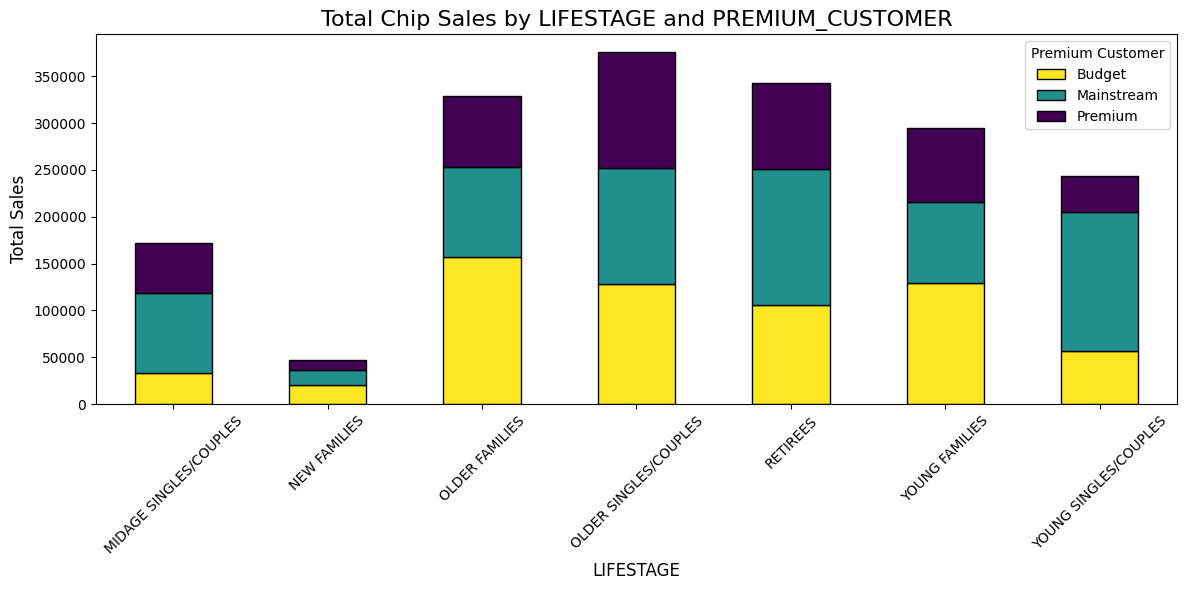

In [105]:
pivot_data.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis_r', edgecolor='black')
plt.title('Total Chip Sales by LIFESTAGE and PREMIUM_CUSTOMER', fontsize=16)
plt.xlabel('LIFESTAGE', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Premium Customer', fontsize=10)
plt.tight_layout()

In [106]:
max_spenders = total_chip_sales.loc[total_chip_sales['TOT_SALES'].idxmax()]
max_spenders

LIFESTAGE           OLDER FAMILIES
PREMIUM_CUSTOMER            Budget
TOT_SALES                156863.75
Name: 0, dtype: object

### How many customers are in each segment


In [107]:
customers_per_segment = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
customers_per_segment

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR
0,MIDAGE SINGLES/COUPLES,Budget,1474
1,MIDAGE SINGLES/COUPLES,Mainstream,3298
2,MIDAGE SINGLES/COUPLES,Premium,2369
3,NEW FAMILIES,Budget,1087
4,NEW FAMILIES,Mainstream,830
5,NEW FAMILIES,Premium,575
6,OLDER FAMILIES,Budget,4611
7,OLDER FAMILIES,Mainstream,2788
8,OLDER FAMILIES,Premium,2231
9,OLDER SINGLES/COUPLES,Budget,4849


### How many chips are bought per customer by segment


In [108]:
chips_per_customer = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum().reset_index()
chips_per_customer

,LIFESTAGE,PREMIUM_CUSTOMER,PROD_QTY
0,MIDAGE SINGLES/COUPLES,Budget,8883
1,MIDAGE SINGLES/COUPLES,Mainstream,21213
2,MIDAGE SINGLES/COUPLES,Premium,14400
3,NEW FAMILIES,Budget,5241
4,NEW FAMILIES,Mainstream,4060
5,NEW FAMILIES,Premium,2769
6,OLDER FAMILIES,Budget,41853
7,OLDER FAMILIES,Mainstream,25804
8,OLDER FAMILIES,Premium,20239
9,OLDER SINGLES/COUPLES,Budget,32883


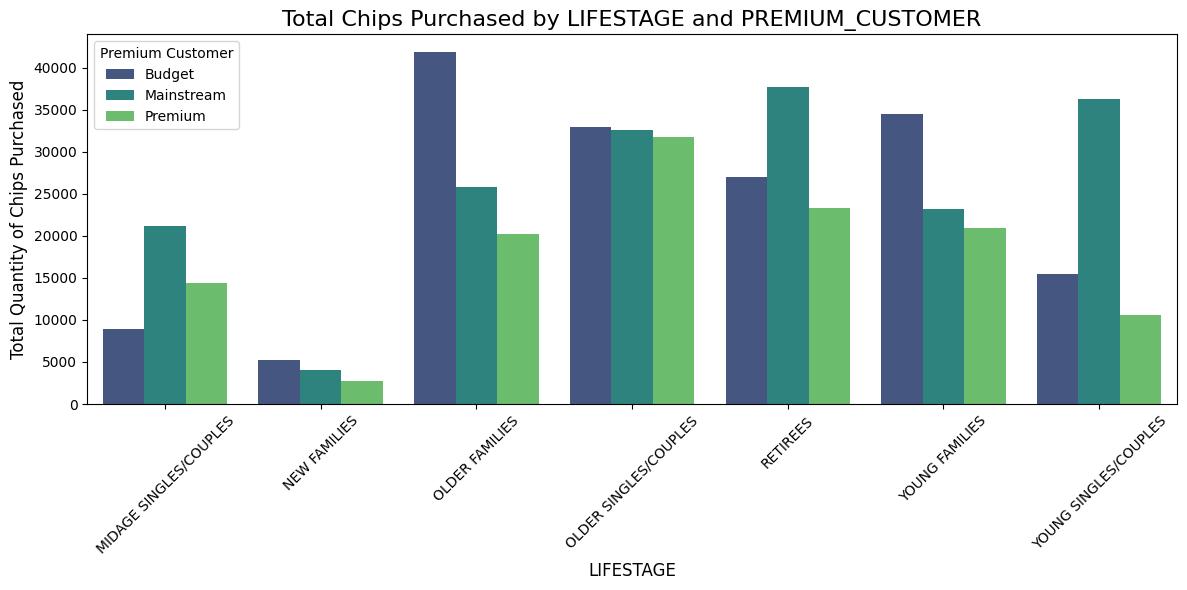

In [109]:
plt.figure(figsize=(12, 6))
sns.barplot(data=chips_per_customer,x='LIFESTAGE', y='PROD_QTY',hue='PREMIUM_CUSTOMER',palette='viridis')
plt.title('Total Chips Purchased by LIFESTAGE and PREMIUM_CUSTOMER', fontsize=16)
plt.xlabel('LIFESTAGE', fontsize=12)
plt.ylabel('Total Quantity of Chips Purchased', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Premium Customer', fontsize=10)
plt.tight_layout()

### What's the average chip price by customer segment


In [110]:
total_sales = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum()
total_quantity = merged_data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['PROD_QTY'].sum()
avg_chip_price = (total_sales / total_quantity).reset_index()
avg_chip_price.columns = ['LIFESTAGE', 'PREMIUM_CUSTOMER', 'AVG_CHIP_PRICE']


In [111]:
avg_chip_price

,LIFESTAGE,PREMIUM_CUSTOMER,AVG_CHIP_PRICE
0,MIDAGE SINGLES/COUPLES,Budget,3.753878
1,MIDAGE SINGLES/COUPLES,Mainstream,3.994449
2,MIDAGE SINGLES/COUPLES,Premium,3.780823
3,NEW FAMILIES,Budget,3.931969
4,NEW FAMILIES,Mainstream,3.935887
5,NEW FAMILIES,Premium,3.886168
6,OLDER FAMILIES,Budget,3.747969
7,OLDER FAMILIES,Mainstream,3.736380
8,OLDER FAMILIES,Premium,3.717703
9,OLDER SINGLES/COUPLES,Budget,3.887529


### Perform an independent t-test between mainstream vs premium and budget midage and young singles and couples

In [112]:
merged_data.head()  

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget


In [113]:
merged_data['UNIT_PRICE'] = merged_data['TOT_SALES'] / merged_data['PROD_QTY']

In [114]:
from scipy import stats

In [115]:
young_midage_mainstream = merged_data[
    (merged_data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) &
    (merged_data['PREMIUM_CUSTOMER'] == 'Mainstream')
]['UNIT_PRICE']

In [116]:
young_midage_non_mainstream = merged_data[
    (merged_data['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES'])) &
     (merged_data['PREMIUM_CUSTOMER'] != 'Mainstream')
]['UNIT_PRICE']

In [117]:
t_test_result = stats.ttest_ind(young_midage_mainstream, young_midage_non_mainstream, alternative='greater', equal_var=False)


In [118]:
print(f"t-statistic: {t_test_result.statistic}")
print(f"p-value: {t_test_result.pvalue}")

t-statistic: 37.6243885962295
p-value: 3.4836771165090696e-306


In [119]:
print(f"Mean of Mainstream group: {young_midage_mainstream.mean()}")
print(f"Mean of Non-Mainstream group: {young_midage_non_mainstream.mean()}")

Mean of Mainstream group: 4.039785893795489
Mean of Non-Mainstream group: 3.706491319964083


In [120]:
if  t_test_result.pvalue < 0.05:
    print("Result: The true difference in means is significantly greater than 0.")
else:
    print("Result: The true difference in means is not significantly greater than 0.")

Result: The true difference in means is significantly greater than 0.
